#과제
breast cancer data를 이용하여 다음 모델을 사용하여 분류작업을 수행합니다.
- 가우시안 나이브 베이즈
- 결정트리 (혹은 자신이 사용하는 다른 모델을 사용해도 좋습니다.)

모델에 대한 ROC Curve 그래프와 AUC값을 표현하세요.
그리고 모델들의 그래프를 비교하여 개인의 생각을 설명하세요.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
# breast_cancer = load_breast_cancer()
# X = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
# y = pd.DataFrame(breast_cancer.data.target, columns =['traget'])
# train_X, test_X, train_y, test_y = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state = 42)


breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.DataFrame(breast_cancer.target, columns=['target'])  # 여기서 breast_cancer.target을 사용합니다.
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)


## 나이브베이즈 모델

In [3]:
from sklearn.naive_bayes import GaussianNB

Accuracy: 0.97

Confusion Matrix:
[[40  3]
 [ 0 71]]
roc_auc : 0.9983622666229938


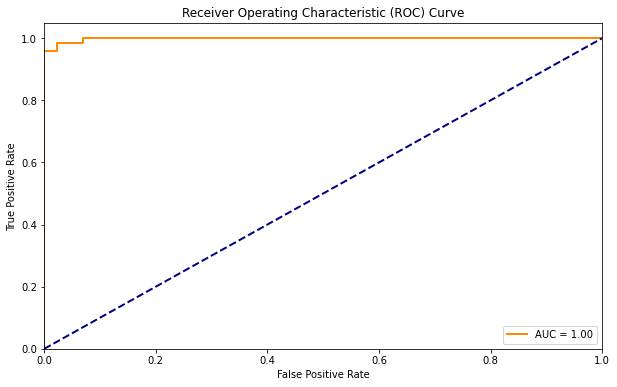

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = GaussianNB()

model.fit(train_X, train_y.values.ravel())

predictions = model.predict(test_X)

accuracy = accuracy_score(test_y, predictions)
print(f"Accuracy: {accuracy:.2f}")


# 혼동 행렬 출력
print("\nConfusion Matrix:")
print(confusion_matrix(test_y, predictions))
# 모델 예측 확률 얻기
probabilities = model.predict_proba(test_X)[:, 1]

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(test_y, probabilities)

# AUC 계산
roc_auc = auc(fpr, tpr)
print('roc_auc :',roc_auc)
# ROC Curve 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## SVM 모델

SVM Accuracy: 0.95

SVM Confusion Matrix:
[[37  6]
 [ 0 71]]
roc_auc : 0.9934490664919751


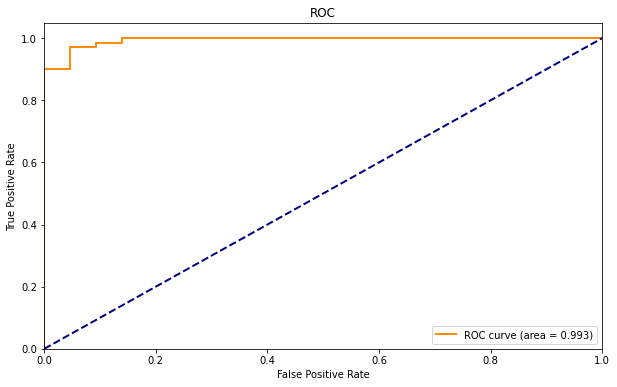

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC(random_state=42)
svm_model.fit(train_X, train_y.values.ravel())

svm_predictions = svm_model.predict(test_X)

svm_accuracy = accuracy_score(test_y, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy:.2f}")


# 혼동 행렬 출력
print("\nSVM Confusion Matrix:")
print(confusion_matrix(test_y, svm_predictions))
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(train_X, train_y.values.ravel())

# 테스트 데이터에 대한 예측 확률을 얻음
svm_probabilities = svm_model.predict_proba(test_X)[:, 1]

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(test_y, svm_probabilities)

# AUC 계산
roc_auc = auc(fpr, tpr)
print('roc_auc :',roc_auc)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label="ROC curve (area = %0.3f)" % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

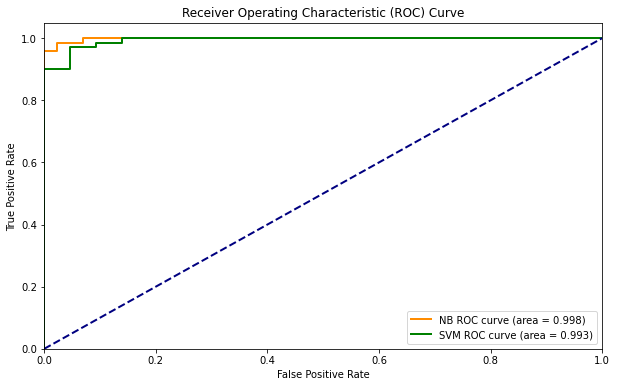

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

nb_model = GaussianNB()
nb_model.fit(train_X, train_y.values.ravel())
nb_predictions = nb_model.predict(test_X)
nb_probabilities = nb_model.predict_proba(test_X)[:, 1]

svm_model = SVC(random_state=42, probability=True)
svm_model.fit(train_X, train_y.values.ravel())
svm_predictions = svm_model.predict(test_X)
svm_probabilities = svm_model.predict_proba(test_X)[:, 1]

fpr_nb, tpr_nb, thresholds_nb = roc_curve(test_y, nb_probabilities)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_svm, tpr_svm, thresholds_svm = roc_curve(test_y, svm_probabilities)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(10, 6))

plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label= 'NB ROC curve (area = %0.3f)' %  roc_auc_nb)

plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='SVM ROC curve (area = %0.3f)' % roc_auc_svm)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## 나의 생각

두 모델 모두 실제 악성 종양인것들은 악성종양이고 제대로 예측했다 하지만 양성종양 예측에 있어서  
나이브베이즈 모델은 43개의 양성종양중 3개를 악성종양이라고 잘못 분류했고 SVM 모델은 43개중 6개를 악성종양이라고 잘못 예측했다.  
악성 종양을 판단하는것이 암 진단에 있어서 중요한 만큼 두 모델 모두 FN가 0이므로 오탐으로 인한 패널티가 크지는 않다고 생각한다.  
하지만 만약 양성종양을 악성으로 판단한 것이 암진단과 치료에 있어서 큰 악영향을 미친다면 오탐한 수가 적긴 하지만 그 위험성때문에  
AUC의 차이는 크지 않지만 나이브베이즈 모델이 더 좋은 성능을 가진다고 생각한다.